# Data Exploration of Ford Go Bike Rides
#### by Ganesh Kumar Ethiraj

## Importing Libraries
----
To begin our exploratory data analysis (EDA) of the Ford Go Bikes dataset, we will need to import several libraries. These include **Numpy** and **Pandas** for data loading and manipulation, and **Matplotlib, Plotly, and Seaborn** for creating visualizations. These libraries will allow us to effectively analyze the data and uncover insights about borrower motivations and factors that may impact loan favorability.

In [1]:
#declare the required packages for data exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#display plots in ipython shell
%matplotlib inline

## Data Wrangling

Lets begin our preliminary analysis by importing our dataset, 201902-fordgobike-tripdata.csv into a pandas dataframe object.

In [2]:
fordbike_df = pd.read_csv('./201902-fordgobike-tripdata.csv')

In [3]:
fordbike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#Display summary of the dataframe
fordbike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

## Initial finding based on the dataset structure

The dataset includes information pertaining to indivial kike rides made in the Greater San Francisco Bay area.

The dataset contains a total of 183,142 rows and 16 Columns,

- Bike ride duration in Seconds
- Start date & time
- End date & time
- Start & End Station id
- Start & End Station name
- Lattitue & Longitude
- Bike id
- User Type(Subscriber & Customer)
- Gender of the Bike User
- Birth Year of the bike user

The Start & End date and time are stored as object instead of DateTime format.
The DateTime information present in the dataset can be broken down into Days of the Week, Day.
Age can be calculated using the birth year of the user
User_type and Gender are stored as object rather than a Category

# Features of Interest in the dataset
I would like to explore the dataset around the number of bike rides which can be calculated using the start time/end time and the location. The follwoing would be the focus of this analysis.

- No of rides by UserType, Gender
- No of rides by DateTime
- Identify Top 10 stations by no of rides
- Identify Bottom 10 stations by no or rides
- Deep dive of rides by different type for Top 10 Stations.

## Data Cleaning

In [5]:
#create a copy of the original dataset for cleaning
fordbike_df_clean = fordbike_df.copy()

In [6]:
#change start_time and end_time to datetime as separate fields
fordbike_df_clean['start_date'] = pd.to_datetime(fordbike_df_clean['start_time']).dt.date
# Create month, dayofweek, hour columns for start date 
fordbike_df_clean['s_month'] = pd.DatetimeIndex(fordbike_df_clean['start_time']).month
fordbike_df_clean['s_dayofweek'] = pd.DatetimeIndex(fordbike_df_clean['start_time']).dayofweek
fordbike_df_clean['s_hour'] = pd.DatetimeIndex(fordbike_df_clean['start_time']).hour

fordbike_df_clean['start_time'] = pd.to_datetime(fordbike_df_clean['start_time']).dt.time

fordbike_df_clean['end_date'] = pd.to_datetime(fordbike_df_clean['end_time']).dt.date
fordbike_df_clean['end_time'] = pd.to_datetime(fordbike_df_clean['end_time']).dt.time



In [7]:
#validation of breaking down the start_time & end_time into the corresponding date and time
fordbike_df_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,s_month,s_dayofweek,s_hour,end_date
0,52185,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,2019-02-28,2,3,17,2019-03-01
1,42521,18:53:21.789000,06:42:03.056000,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,2019-02-28,2,3,18,2019-03-01


In [8]:
#check for missing values
fordbike_df_clean.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
start_date                    0
s_month                       0
s_dayofweek                   0
s_hour                        0
end_date                      0
dtype: int64

>- This clearly shows that there are missing values in start_station_name, end_station_name, member_birth_year and member_gender.

In [9]:
fordbike_df_clean['member_gender'].replace(np.nan, 'Not Available', inplace=True)

In [10]:
#fill null values
for nullvalues in ['start_station_id','end_station_id','start_station_name', 'end_station_name', 'member_birth_year' ]:
    fordbike_df_clean[nullvalues] = fordbike_df_clean[nullvalues].fillna(fordbike_df_clean[nullvalues].mode()[0])

In [11]:
#check for missing values
fordbike_df_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_date                 0
s_month                    0
s_dayofweek                0
s_hour                     0
end_date                   0
dtype: int64

In [12]:
#check for duplicates
fordbike_df_clean.duplicated().sum()

0

In [13]:
#change user_type, member_gender to a categrorical value
fordbike_df_clean.user_type = fordbike_df_clean.user_type.astype('category')
fordbike_df_clean.member_gender = fordbike_df_clean.member_gender.astype('category')

In [14]:
#validation of change in user_type, member_gender and bike_share_for_all_trip to a categrorical value
fordbike_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             183412 non-null  int64   
 1   start_time               183412 non-null  object  
 2   end_time                 183412 non-null  object  
 3   start_station_id         183412 non-null  float64 
 4   start_station_name       183412 non-null  object  
 5   start_station_latitude   183412 non-null  float64 
 6   start_station_longitude  183412 non-null  float64 
 7   end_station_id           183412 non-null  float64 
 8   end_station_name         183412 non-null  object  
 9   end_station_latitude     183412 non-null  float64 
 10  end_station_longitude    183412 non-null  float64 
 11  bike_id                  183412 non-null  int64   
 12  user_type                183412 non-null  category
 13  member_birth_year        183412 non-null  fl

In [15]:
#change bike_id, start_station_id, end_station_id to str as there is no need for them to be used in any calcs
fordbike_df_clean.start_station_id = fordbike_df_clean.bike_id.astype(str)
fordbike_df_clean.end_station_id = fordbike_df_clean.bike_id.astype(str)
fordbike_df_clean.bike_id = fordbike_df_clean.bike_id.astype(str)

In [16]:
#validation of the above change
fordbike_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             183412 non-null  int64   
 1   start_time               183412 non-null  object  
 2   end_time                 183412 non-null  object  
 3   start_station_id         183412 non-null  object  
 4   start_station_name       183412 non-null  object  
 5   start_station_latitude   183412 non-null  float64 
 6   start_station_longitude  183412 non-null  float64 
 7   end_station_id           183412 non-null  object  
 8   end_station_name         183412 non-null  object  
 9   end_station_latitude     183412 non-null  float64 
 10  end_station_longitude    183412 non-null  float64 
 11  bike_id                  183412 non-null  object  
 12  user_type                183412 non-null  category
 13  member_birth_year        183412 non-null  fl

In [17]:
#breakdown the duration_sec column into its corresponding hours and minures.
fordbike_df_clean['duration_mins'] = fordbike_df_clean['duration_sec']/60
fordbike_df_clean['duration_hrs'] = fordbike_df_clean['duration_mins']/60

fordbike_df_clean['duration_mins'] = fordbike_df_clean['duration_mins'].astype(float)
fordbike_df_clean['duration_hrs'] = fordbike_df_clean['duration_hrs'].astype(float)

#categorizing time of the day based on duration_hrs
fordbike_df_clean['period_of_day'] = 'Morning'
fordbike_df_clean['period_of_day'][(fordbike_df_clean['s_hour'] >= 12) & (fordbike_df_clean['s_hour'] <= 17)] = 'Afternoon'
fordbike_df_clean['period_of_day'][(fordbike_df_clean['s_hour'] >= 18) & (fordbike_df_clean['s_hour'] <= 24)] = 'Night'


C:\Users\ganes\AppData\Local\Temp\ipykernel_11164\312548956.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fordbike_df_clean['period_of_day'][(fordbike_df_clean['s_hour'] >= 12) & (fordbike_df_clean['s_hour'] <= 17)] = 'Afternoon'
C:\Users\ganes\AppData\Local\Temp\ipykernel_11164\312548956.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fordbike_df_clean['period_of_day'][(fordbike_df_clean['s_hour'] >= 18) & (fordbike_df_clean['s_hour'] <= 24)] = 'Night'


In [18]:
#validation of above changes
fordbike_df_clean.period_of_day.unique()

array(['Afternoon', 'Night', 'Morning'], dtype=object)

In [19]:
#create a new column Age
fordbike_df_clean['Age'] = 2019 - fordbike_df_clean['member_birth_year']

In [20]:
#validation of the above change
fordbike_df_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,start_date,s_month,s_dayofweek,s_hour,end_date,duration_mins,duration_hrs,period_of_day,Age
0,52185,17:32:10.145000,08:01:55.975000,4902,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4902,Commercial St at Montgomery St,37.794231,...,No,2019-02-28,2,3,17,2019-03-01,869.750000,14.495833,Afternoon,35.0
1,42521,18:53:21.789000,06:42:03.056000,2535,The Embarcadero at Steuart St,37.791464,-122.391034,2535,Berry St at 4th St,37.775880,...,No,2019-02-28,2,3,18,2019-03-01,708.683333,11.811389,Night,31.0


In [21]:
fordbike_df_clean.Age.unique()

array([ 35.,  31.,  47.,  30.,  45.,  60.,  36.,  27.,  23.,  26.,  29.,
        38.,  44.,  41.,  28.,  22.,  33.,  19.,  37.,  24.,  39.,  46.,
        34.,  48.,  40.,  52.,  21.,  25.,  42.,  20.,  32.,  50.,  56.,
        43.,  55.,  54.,  58.,  51.,  53.,  57.,  65.,  61.,  59.,  49.,
        63.,  62.,  74., 119.,  67.,  71.,  68.,  78.,  69.,  70.,  66.,
        64.,  73.,  72.,  88.,  76.,  77.,  99.,  86.,  18., 141., 118.,
        75.,  91.,  85.,  80.,  89., 117., 109.,  81.,  92.])

In [22]:
#with an assumption that it will be difficult to ride a bike above the age of 75, 
#i will be droping those records from analysis
indexAge = fordbike_df_clean[(fordbike_df_clean['Age'] >= 75)].index
fordbike_df_clean.drop(indexAge , inplace=True)
fordbike_df_clean.Age.unique()

array([35., 31., 47., 30., 45., 60., 36., 27., 23., 26., 29., 38., 44.,
       41., 28., 22., 33., 19., 37., 24., 39., 46., 34., 48., 40., 52.,
       21., 25., 42., 20., 32., 50., 56., 43., 55., 54., 58., 51., 53.,
       57., 65., 61., 59., 49., 63., 62., 74., 67., 71., 68., 69., 70.,
       66., 64., 73., 72., 18.])

In [23]:
fordbike_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183147 entries, 0 to 183411
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             183147 non-null  int64   
 1   start_time               183147 non-null  object  
 2   end_time                 183147 non-null  object  
 3   start_station_id         183147 non-null  object  
 4   start_station_name       183147 non-null  object  
 5   start_station_latitude   183147 non-null  float64 
 6   start_station_longitude  183147 non-null  float64 
 7   end_station_id           183147 non-null  object  
 8   end_station_name         183147 non-null  object  
 9   end_station_latitude     183147 non-null  float64 
 10  end_station_longitude    183147 non-null  float64 
 11  bike_id                  183147 non-null  object  
 12  user_type                183147 non-null  category
 13  member_birth_year        183147 non-null  fl

In [24]:
#change Age datatype to integer as Age cannot be in decimal
fordbike_df_clean['Age'] = fordbike_df_clean['Age'].astype(int)

In [25]:
#validation of the above change
fordbike_df_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,start_date,s_month,s_dayofweek,s_hour,end_date,duration_mins,duration_hrs,period_of_day,Age
0,52185,17:32:10.145000,08:01:55.975000,4902,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4902,Commercial St at Montgomery St,37.794231,...,No,2019-02-28,2,3,17,2019-03-01,869.750000,14.495833,Afternoon,35
1,42521,18:53:21.789000,06:42:03.056000,2535,The Embarcadero at Steuart St,37.791464,-122.391034,2535,Berry St at 4th St,37.775880,...,No,2019-02-28,2,3,18,2019-03-01,708.683333,11.811389,Night,31


## A. Univariate Exploration

#### Question 1:

What is the split of the bike users?

#### Visualization

In [26]:
fordbike_df_clean.user_type.value_counts()

Subscriber    163293
Customer       19854
Name: user_type, dtype: int64

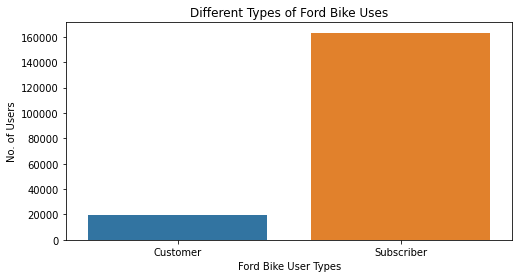

In [27]:
#plot a bar chart to show the types of users
# Set color for all univariate plots
colors = sns.color_palette('Paired')

plt.figure(figsize=[8,4])
plot =sns.countplot(data=fordbike_df_clean, x='user_type')
plt.xlabel('Ford Bike User Types')
plt.ylabel('No. of Users')
plt.title('Different Types of Ford Bike Uses')
plt.show()

% of diff. types of Bike Riders

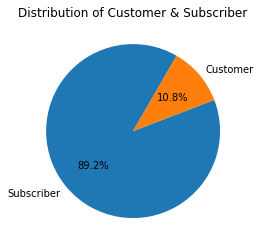

In [28]:
#create pie chart using a user defined function
def plot_fun(data, x, title):
    """Ploting pie chart of [x] using a function"""
    plt.figure(figsize=[8,4])
    pie_chart_count = fordbike_df_clean.user_type.value_counts()
    plt.pie(pie_chart_count, labels=pie_chart_count.index, 
       autopct='%1.1f%%',shadow=False, startangle = 60)

    plt.title(title)
    plt.show()

plot_fun(data=fordbike_df_clean, x="user_type", title="Distribution of Customer & Subscriber")

#### Observations

>- Both the bar chart & the pie chart confirms that there are more subscribers compared to the customers. 89.2% of the total bike riders are repeat users.

#### Question 2:

What is the distribure of users by Age?

#### Visualization

In [29]:
fordbike_df_clean['Age'].mean()

33.96397429387323

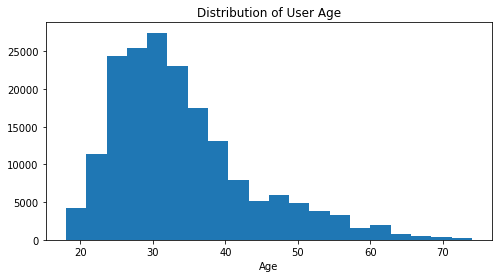

In [30]:
#distribution of user age
plt.figure(figsize=[8, 4])
plt.hist(data = fordbike_df_clean, x = 'Age', bins=20)
plt.xlabel('Age')
plt.title('Distribution of User Age')
plt.show()


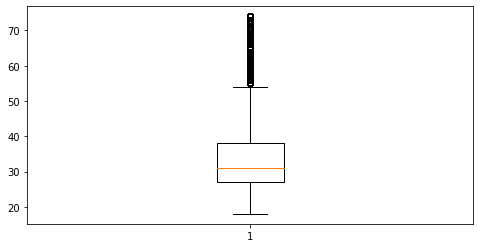

In [31]:
#validate user age for outliers
plt.figure(figsize=[8, 4])
plt.boxplot(fordbike_df_clean['Age'])
plt.show()

#### Observations
>-  According to the histogram, box plot, the average age of bike riders is 33.96. The box plots also estblishes the fact that there are outliers which require further anlaysis and treatment.

#### Question 3:
What is the distribution of bike riders by Gender?

#### Visualization

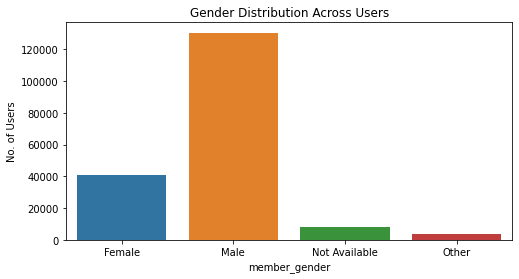

In [32]:
#Gender distribution
plt.figure(figsize=[8, 4])
sns.countplot(data=fordbike_df_clean, x='member_gender')
plt.title("Gender Distribution Across Users")
plt.ylabel('No. of Users')
plt.show()

#### Observations
>-  Male riders dominate the community compared to Female and other/not available group of riders.

#### Question 4:
What is the distribution of bike rides per hour in a day?

#### Visualization

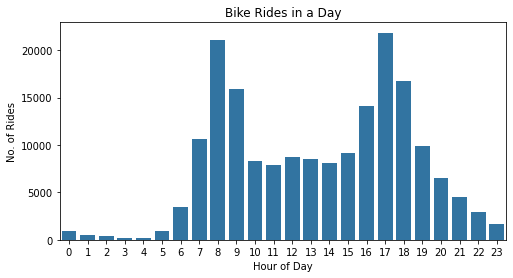

In [33]:
# number of bike rides in an hour
plt.figure(figsize=(8,4))
sns.countplot(data=fordbike_df_clean, x='s_hour', color = colors[1])
plt.title('Bike Rides in a Day')
plt.ylabel('No. of Rides')
plt.xlabel('Hour of Day')
plt.show()

#### Observations

>- The Bar plot clearly shows spikes at 8 AM and 5 PM which should be in line with the general working hours.
>- There is a gradual incrase in usage from 5 AM and reaches maximum utilization by 8 AM and drops afterwards. 
>- It does increase marginally during lunch hours between 12 to 1 PM.
>- The usage starts to increase around 3 PM and peaks at 5 PM with considerable slow down afterwards.
>- The data supports usage of bike rides during typical commuting hours.

#### Question 5:
What is the distribution of bike rides across the week?

#### Visualization

In [34]:
#replace numeric values in days of week with the relevant weekday
fordbike_df_clean['s_dayofweek'].replace(0, 'Monday', inplace=True)
fordbike_df_clean['s_dayofweek'].replace(1, 'Tuesday', inplace=True)
fordbike_df_clean['s_dayofweek'].replace(2, 'Wednesday', inplace=True)
fordbike_df_clean['s_dayofweek'].replace(3, 'Thursday', inplace=True)
fordbike_df_clean['s_dayofweek'].replace(4, 'Friday', inplace=True)
fordbike_df_clean['s_dayofweek'].replace(5, 'Saturday', inplace=True)
fordbike_df_clean['s_dayofweek'].replace(6, 'Sunday', inplace=True)

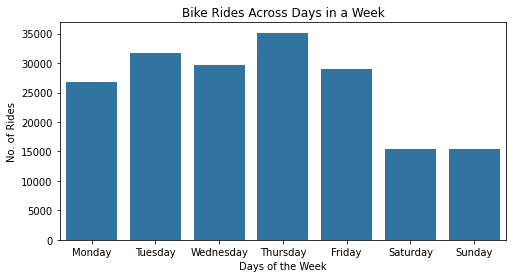

In [35]:
#number of bike rides in a week
seq = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,4))
sns.countplot(data=fordbike_df_clean, x='s_dayofweek', color = colors[1], order = seq)
plt.title('Bike Rides Across Days in a Week')
plt.xlabel('Days of the Week')
plt.ylabel('No. of Rides')
plt.show()

#### Observations

>- The frequency of bike rides is higher during weekdays as shown in the above visual, which may be due to the fact that more people use the service for commuting during the workweek.

#### Question 6:
What is the distribution of bike rides across the year?

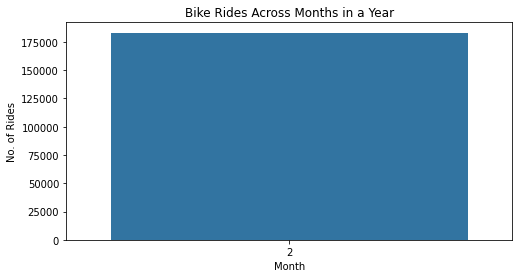

In [36]:
#number of bike rides across months in a year
plt.figure(figsize=(8,4))
sns.countplot(data=fordbike_df_clean, x='s_month', color = colors[1])
plt.title('Bike Rides Across Months in a Year')
plt.xlabel('Month')
plt.ylabel('No. of Rides')
plt.show()

#### Observations

>- Visual inspection of the data using Excel and the plot above show that the dataset only contains data from a single month, which does not provide enough information to determine any trends over months.

#### Question 6:
Which are the Top 10 Start Station based on the No of rides?

In [37]:
#count of unique start stations
fordbike_df_clean.start_station_name.nunique()

329

>- There are 329 unique bike stations.

In [38]:
#list of unique stations namess
fordbike_df_clean.start_station_name.unique()

array(['Montgomery St BART Station (Market St at 2nd St)',
       'The Embarcadero at Steuart St', 'Market St at Dolores St',
       'Grove St at Masonic Ave', 'Frank H Ogawa Plaza',
       '4th St at Mission Bay Blvd S', 'Palm St at Willow St',
       'Washington St at Kearny St', 'Post St at Kearny St',
       'Jones St at Post St',
       'Civic Center/UN Plaza BART Station (Market St at McAllister St)',
       'Valencia St at 21st St', 'Channing Way at Shattuck Ave',
       'Bancroft Way at College Ave', 'Howard St at Mary St',
       '22nd St at Dolores St', 'Laguna St at Hayes St',
       '5th St at Folsom', 'Telegraph Ave at 23rd St',
       'Page St at Scott St', 'Lake Merritt BART Station',
       'West St at 40th St', 'The Embarcadero at Sansome St',
       'Folsom St at 9th St', 'University Ave at Oxford St',
       'MLK Jr Way at University Ave', 'The Embarcadero at Bryant St',
       '17th St at Valencia St', 'Valencia St at 16th St',
       'Valencia St at 22nd St', 'Fran

#### Visualization

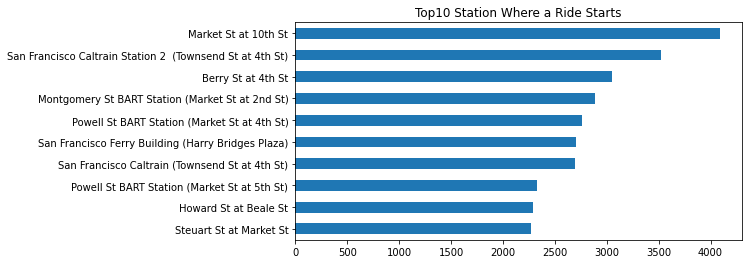

In [39]:
#Top 10 Most used start stations
plt.figure(figsize=(8,4))
fordbike_df_clean.start_station_name.value_counts(ascending = True).tail(10).plot.barh()
plt.title("Top10 Station Where a Ride Starts")
plt.show()

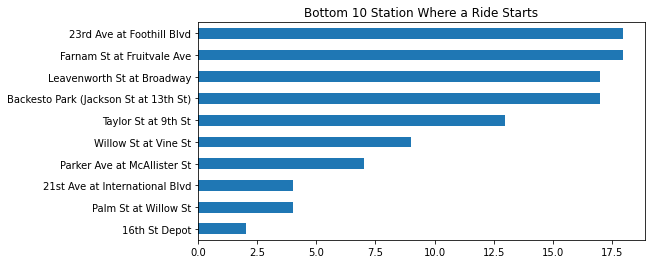

In [40]:
#Bottom 10 Most used start stations
plt.figure(figsize=(8,4))
fordbike_df_clean.start_station_name.value_counts(ascending = True).head(10).plot.barh()
plt.title("Bottom 10 Station Where a Ride Starts")
plt.show()

#### Observations
>- Market St at 10th St is the most populous station where a ride starts based on the number of rides and 16th St Depot is the least one.
#### Question 6:
Which are the Top 10 End Station based on the No of rides?
#### Visualization

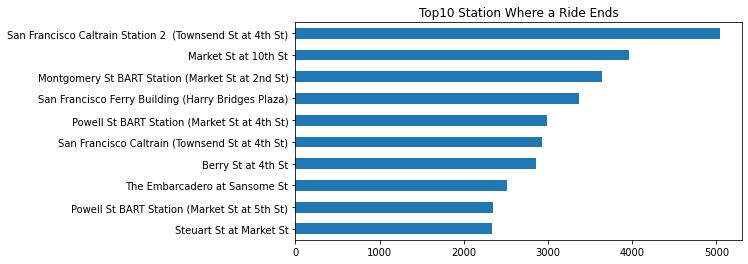

In [41]:
#Top 10 Most used end stations
plt.figure(figsize=(8,4))
fordbike_df_clean.end_station_name.value_counts(ascending = True).tail(10).plot.barh()
plt.title("Top10 Station Where a Ride Ends")
plt.show()

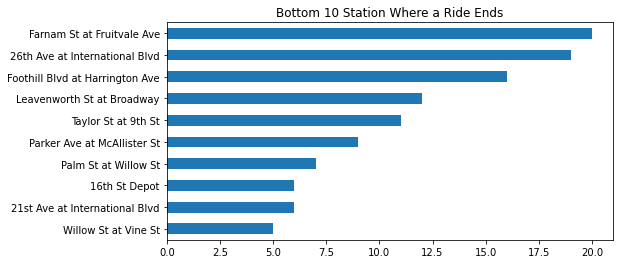

In [42]:
#Bottom 10 Most used end stations
plt.figure(figsize=(8,4))
fordbike_df_clean.end_station_name.value_counts(ascending = True).head(10).plot.barh()
plt.title("Bottom 10 Station Where a Ride Ends")
plt.show()

#### Observations
>- San Franisco Caltrain Station 2 is the station where most of the bike rides terminate which is understandable owing to a connecting train stations.
>- Willow St at Vine St is used rarely to terminate a ride.

### B. Bivariate Exploration
---
The goal is now to discover relationships between variables.

#### Question 1: 

What is the split of user_type againts the no of rides in a day?
#### Visualization

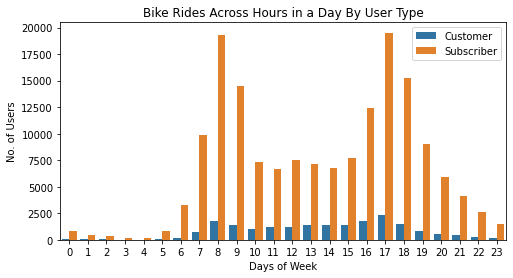

In [43]:
#Customer Vs Subscriber Analysis Hours of the Day
plt.figure(figsize=(8,4))
sns.countplot(data=fordbike_df_clean, x='s_hour', hue='user_type')
plt.title('Bike Rides Across Hours in a Day By User Type')
plt.legend(title=None)
plt.xlabel('Days of Week')
plt.ylabel('No. of Users')
plt.show()

#### Observations

>- It is evident that subscribers primarily use the bikes during morning and evening rush hours, likely for commuting to and from work or school. There is a decrease in usage during midday. 
>- On the other hand, customers tend to rent bikes during the daytime, with peak usage at 8am and 5pm. The morning peak is less pronounced for customers, who are likely tourists or infrequent riders.

#### Question 2: 

What is the split of user_type againts the no of rides across a week?
#### Visualization

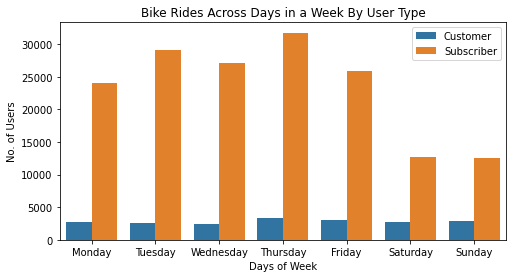

In [44]:
#Customer Vs Subscriber Analysis by Day of the Week
plt.figure(figsize=(8,4))
sns.countplot(data=fordbike_df_clean, x='s_dayofweek', order=seq, hue='user_type')
plt.title('Bike Rides Across Days in a Week By User Type')
plt.legend(title=None)
plt.xlabel('Days of Week')
plt.ylabel('No. of Users')
plt.show()

#### Observations

>- It appears that subscribers tend to use the bikes more frequently for commuting during weekdays and less on weekends. 
>- The usage patterns for customers, however, seem to remain relatively consistent throughout the week, with slightly higher usage on Fridays and Saturdays, likely due to recreational ridership.

#### Question 3: 

What is the distribution of Bike users againts the no of rides in a day?

#### Visualization

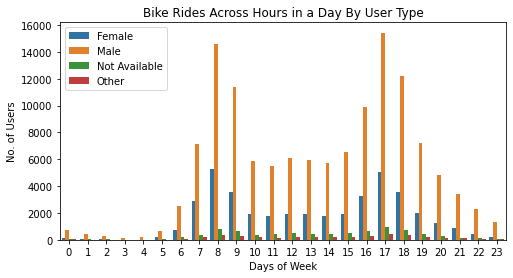

In [45]:
#Gender Analysis Hours of the Day
plt.figure(figsize=(8,4))
sns.countplot(data=fordbike_df_clean, x='s_hour', hue='member_gender')
plt.title('Bike Rides Across Hours in a Day By User Type')
plt.legend(title=None)
plt.xlabel('Days of Week')
plt.ylabel('No. of Users')
plt.show()

#### Observations

>- Male riders are dominating throghout the day compared to Female and other categories.

#### Question 4: 

What is the distribution of Bike users againts the no of rides in a week?

#### Visualization

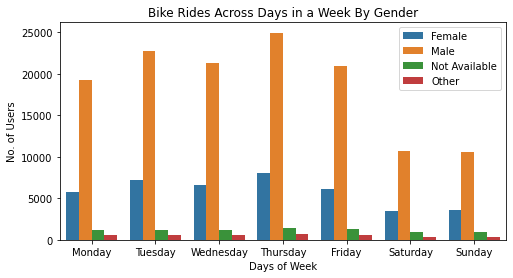

In [46]:
#Gender Analysis by Day of the Week
plt.figure(figsize=(8,4))
sns.countplot(data=fordbike_df_clean, x='s_dayofweek', order=seq, hue='member_gender')
plt.title('Bike Rides Across Days in a Week By Gender')
plt.legend(title=None)
plt.xlabel('Days of Week')
plt.ylabel('No. of Users')
plt.show()

#### Observations

>- Male riders are dominating throghout the day compared to Female and other categories in line with the previous one.

#### Question 5: 

Is there any correlation between the Age and the Duration of the rides?

#### Visualization

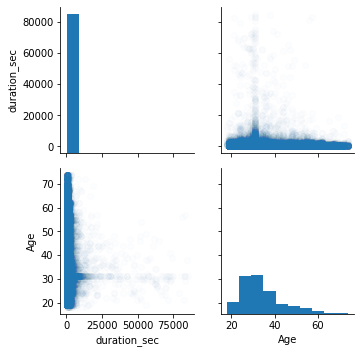

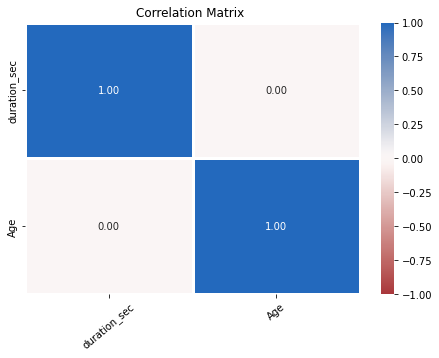

In [47]:
#Store numerical values in a list
numeric_columns = ['duration_sec', 'Age']

#create a scatter plot to establish relationship
fig = sns.PairGrid(fordbike_df_clean[numeric_columns])
fig.map_diag(plt.hist, color = colors[1])
fig.map_offdiag(plt.scatter,color = colors[1], alpha=0.01)

# Visualize the correlation between the numeric variables with a heatmap
plt.figure(figsize= (7.5, 5))
sns.heatmap(data=fordbike_df_clean[numeric_columns].corr(), annot=True, fmt='.2f', 
            cmap='vlag_r', vmin=-1, vmax=1, linewidth=3)
plt.title('Correlation Matrix ')
plt.xticks(rotation=40);

#### Observations

>- The above visual confirms that there is no corelation betweem Age of the bike rider and the time spend during the ride.

#### Identifying the Top 10 Stations where a ride orginates.

In [48]:
#Top10 Station Names
station_name = fordbike_df_clean.start_station_name.value_counts(ascending = True).tail(10)
start_top10 = station_name.index.tolist()
fordbike_top10 = fordbike_df_clean.loc[fordbike_df_clean['start_station_name'].isin(start_top10)]
fordbike_top10['start_station_name'].value_counts()

Market St at 10th St                                         4096
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3527
Berry St at 4th St                                           3050
Montgomery St BART Station (Market St at 2nd St)             2891
Powell St BART Station (Market St at 4th St)                 2758
San Francisco Ferry Building (Harry Bridges Plaza)           2708
San Francisco Caltrain (Townsend St at 4th St)               2691
Powell St BART Station (Market St at 5th St)                 2326
Howard St at Beale St                                        2288
Steuart St at Market St                                      2273
Name: start_station_name, dtype: int64

In [49]:
fordbike_top10

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,start_date,s_month,s_dayofweek,s_hour,end_date,duration_mins,duration_hrs,period_of_day,Age
0,52185,17:32:10.145000,08:01:55.975000,4902,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4902,Commercial St at Montgomery St,37.794231,...,No,2019-02-28,2,Thursday,17,2019-03-01,869.750000,14.495833,Afternoon,35
38,1066,23:31:16.139000,23:49:02.792000,5938,Market St at 10th St,37.776619,-122.417385,5938,29th St at Church St,37.743684,...,No,2019-02-28,2,Thursday,23,2019-02-28,17.766667,0.296111,Night,27
42,1554,23:20:24.089000,23:46:19.019000,5411,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5411,Yerba Buena Center for the Arts (Howard St at ...,37.784872,...,No,2019-02-28,2,Thursday,23,2019-02-28,25.900000,0.431667,Night,47
54,401,23:30:52.471000,23:37:33.955000,5407,Market St at 10th St,37.776619,-122.417385,5407,Victoria Manalo Draves Park,37.777791,...,No,2019-02-28,2,Thursday,23,2019-02-28,6.683333,0.111389,Night,29
63,239,23:28:42.709000,23:32:41.769000,5731,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5731,Bryant St at 2nd St,37.783172,...,No,2019-02-28,2,Thursday,23,2019-02-28,3.983333,0.066389,Night,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183365,932,01:07:51.908000,01:23:24.370000,4962,Market St at 10th St,37.776619,-122.417385,4962,Valencia St at 22nd St,37.755213,...,No,2019-02-01,2,Friday,1,2019-02-01,15.533333,0.258889,Morning,19
183366,932,01:07:49.971000,01:23:22.528000,5382,Market St at 10th St,37.776619,-122.417385,5382,Valencia St at 22nd St,37.755213,...,No,2019-02-01,2,Friday,1,2019-02-01,15.533333,0.258889,Morning,19
183371,196,01:08:38.641000,01:11:54.949000,2395,Market St at 10th St,37.776619,-122.417385,2395,Market St at Franklin St,37.773793,...,No,2019-02-01,2,Friday,1,2019-02-01,3.266667,0.054444,Morning,31
183399,958,00:12:24.247000,00:28:22.738000,3392,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3392,Market St at 10th St,37.776619,...,No,2019-02-01,2,Friday,0,2019-02-01,15.966667,0.266111,Morning,26


In [50]:
fordbike_df_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,start_date,s_month,s_dayofweek,s_hour,end_date,duration_mins,duration_hrs,period_of_day,Age
0,52185,17:32:10.145000,08:01:55.975000,4902,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4902,Commercial St at Montgomery St,37.794231,...,No,2019-02-28,2,Thursday,17,2019-03-01,869.750000,14.495833,Afternoon,35
1,42521,18:53:21.789000,06:42:03.056000,2535,The Embarcadero at Steuart St,37.791464,-122.391034,2535,Berry St at 4th St,37.775880,...,No,2019-02-28,2,Thursday,18,2019-03-01,708.683333,11.811389,Night,31
2,61854,12:13:13.218000,05:24:08.146000,5905,Market St at Dolores St,37.769305,-122.426826,5905,Powell St BART Station (Market St at 4th St),37.786375,...,No,2019-02-28,2,Thursday,12,2019-03-01,1030.900000,17.181667,Afternoon,47
3,36490,17:54:26.010000,04:02:36.842000,6638,Grove St at Masonic Ave,37.774836,-122.446546,6638,Central Ave at Fell St,37.773311,...,No,2019-02-28,2,Thursday,17,2019-03-01,608.166667,10.136111,Afternoon,30
4,1585,23:54:18.549000,00:20:44.074000,4898,Frank H Ogawa Plaza,37.804562,-122.271738,4898,10th Ave at E 15th St,37.792714,...,Yes,2019-02-28,2,Thursday,23,2019-03-01,26.416667,0.440278,Night,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,00:04:49.724000,00:12:50.034000,4832,Beale St at Harrison St,37.788059,-122.391865,4832,Union Square (Powell St at Post St),37.788300,...,No,2019-02-01,2,Friday,0,2019-02-01,8.000000,0.133333,Morning,23
183408,313,00:05:34.744000,00:10:48.502000,4960,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4960,3rd St at Townsend St,37.778742,...,No,2019-02-01,2,Friday,0,2019-02-01,5.216667,0.086944,Morning,35
183409,141,00:06:05.549000,00:08:27.220000,3824,The Alameda at Bush St,37.331932,-121.904888,3824,Morrison Ave at Julian St,37.333658,...,Yes,2019-02-01,2,Friday,0,2019-02-01,2.350000,0.039167,Morning,29
183410,139,00:05:34.360000,00:07:54.287000,5095,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,5095,San Pablo Ave at 27th St,37.817827,...,No,2019-02-01,2,Friday,0,2019-02-01,2.316667,0.038611,Morning,31


#### Question 6: 

How does the time of the day impact the station where the ride originates?

#### Visualization

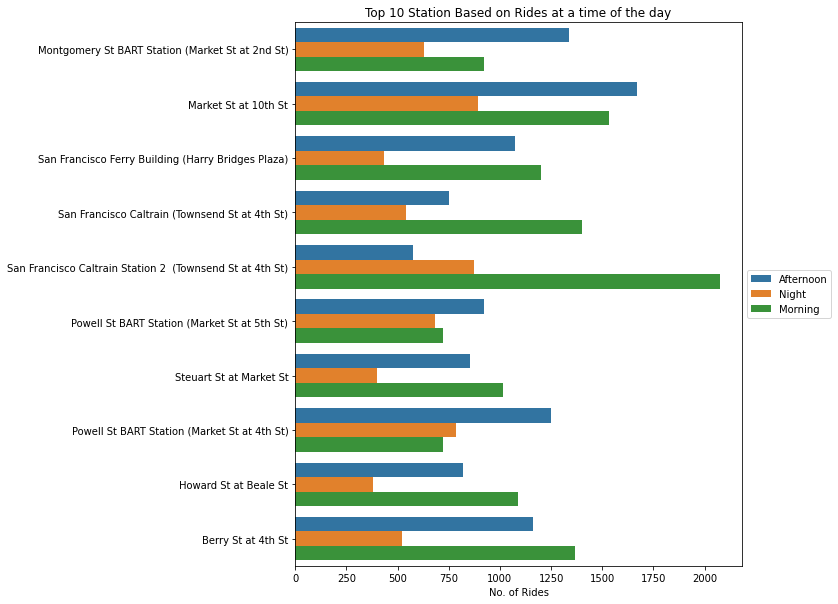

In [51]:
plt.figure(figsize=(8,10))
sns.countplot(data=fordbike_top10, y='start_station_name', hue='period_of_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 10 Station Based on Rides at a time of the day')
plt.ylabel('')
plt.xlabel('No. of Rides')
plt.show()

#### Observations

>- Eventhough Market St at 10th St proved to be most popular station for a ride to start, Night rides are pulling the numbers down considering other locations.

#### Question 7: 

How does the day of the week impact the station where the ride originates?

#### Visualization

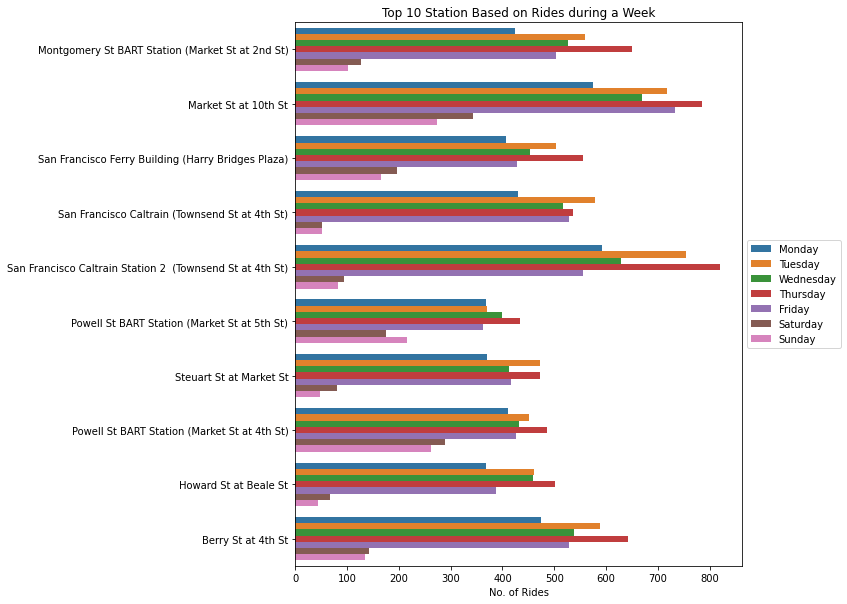

In [52]:
plt.figure(figsize=(8,10))
sns.countplot(data=fordbike_top10, y='start_station_name', hue='s_dayofweek', hue_order=seq)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 10 Station Based on Rides during a Week')
plt.ylabel('')
plt.xlabel('No. of Rides')
plt.show()

#### Observations

>- Market St at 10th St and San Francisco Caltrain location are equally popular through the week.

>- The distribution of trips by time of day is not clear cut, with some stations showing higher usage in the morning and others showing higher usage in the afternoon. Further investigation is needed to understand the pattern. 


#### Question 8: 

How does the user type impact the station where the ride originates?

#### Visualization

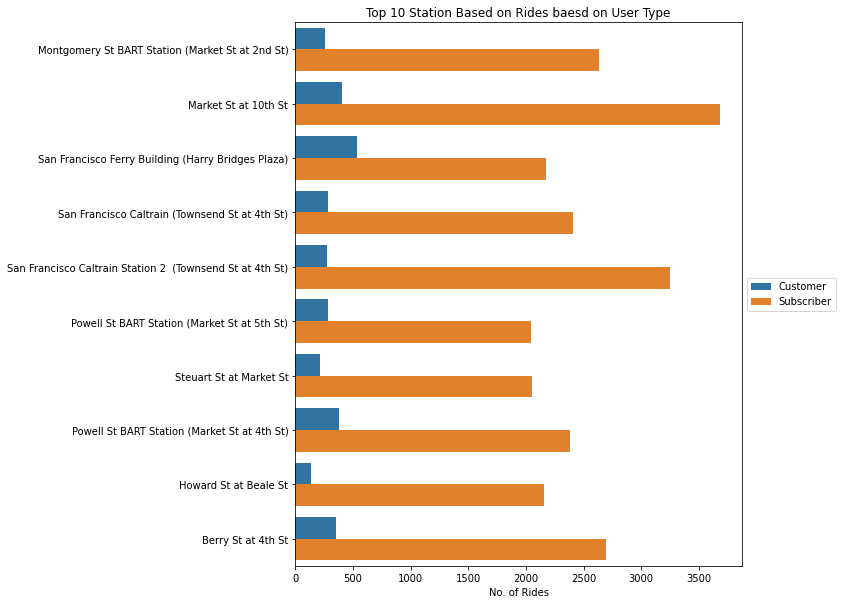

In [53]:
#By user type
plt.figure(figsize=(8,10))
sns.countplot(data=fordbike_top10, y='start_station_name', hue='user_type')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 10 Station Based on Rides baesd on User Type')
plt.ylabel('')
plt.xlabel('No. of Rides')
plt.show()

#### Observations

>- It is clearly evident that subscribers are the frequent riders when comparaed to customers.

#### Question 9: 

How does the Gender impact the station where the ride originates?

#### Visualization

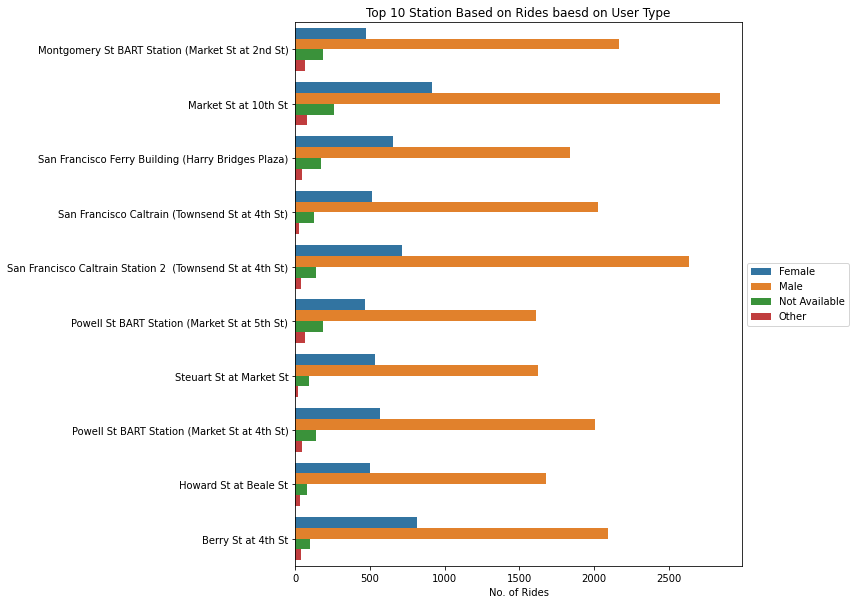

In [54]:
#By Gender
plt.figure(figsize=(8,10))
sns.countplot(data=fordbike_top10, y='start_station_name', hue='member_gender')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 10 Station Based on Rides baesd on User Type')
plt.ylabel('')
plt.xlabel('No. of Rides')
plt.show()

#### Observations

>- It is clearly evident that Male riders dominate the bike rides which is consistent with previous finding pertaining to the entire data set.

### C. Multivariate Exploration

#### Question 1: 

How does the Average duration of rides across the day compare againts the user types?

#### Visualization

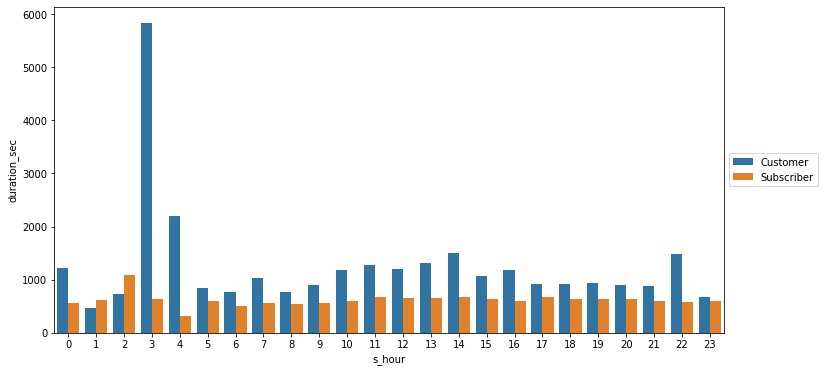

In [55]:
#Two Categorical value with a numeric value
#Average duration of bike rides in hours. I h
plt.figure(figsize=(12,6))
sns.barplot(data=fordbike_top10.query('duration_sec <= 7200'), x='s_hour', y='duration_sec', hue='user_type', errwidth = 0)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

>- The average duration of bike ride for customer at 3 AM is definetely an outlier and the rest of the hours looks consistent.

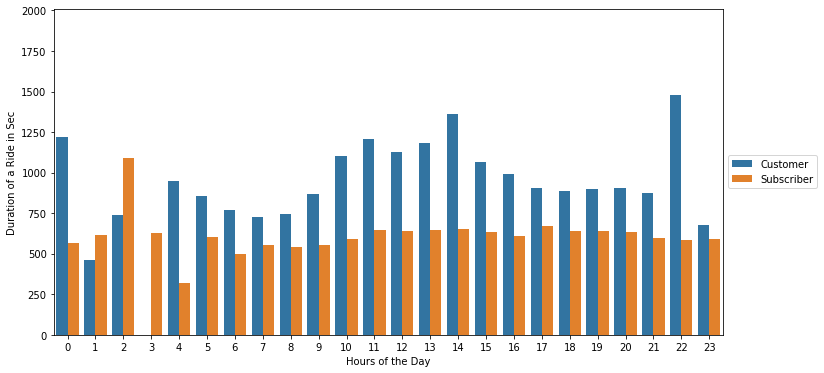

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(data=fordbike_top10.query('duration_sec <= 5000'), x='s_hour', y='duration_sec', hue='user_type', errwidth = 0)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('Hours of the Day')
plt.ylabel('Duration of a Ride in Sec')
plt.show()

#### Observations

>- The average length of time that customers spend using the service is greater than that of subscribers. The graph illustrates this pattern for both groups, with customers having the longest average duration between 10am and 5pm, with a peak at 2pm.

#### Question 2: 

How does the Average duration of rides across the week compare againts the user types?

#### Visualization

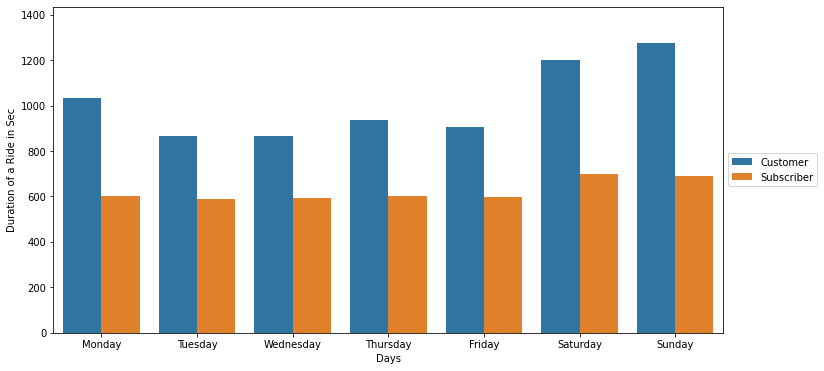

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(data=fordbike_top10.query('duration_sec <= 5000'), x='s_dayofweek', y='duration_sec', hue='user_type', order=seq, errwidth = 0)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('Days')
plt.ylabel('Duration of a Ride in Sec')
plt.show()

#### Observations

>- The average daily trip duration for customers is longer than that of subscribers. 
>- The weekly pattern is similar for both user types, with longer trips taken during the weekend for both groups. However, customers tend to take even longer trips during the weekend.

#### Question 3: 

How does the Average duration of rides across the week compare againts the user types using a Heatmap?

#### Visualization

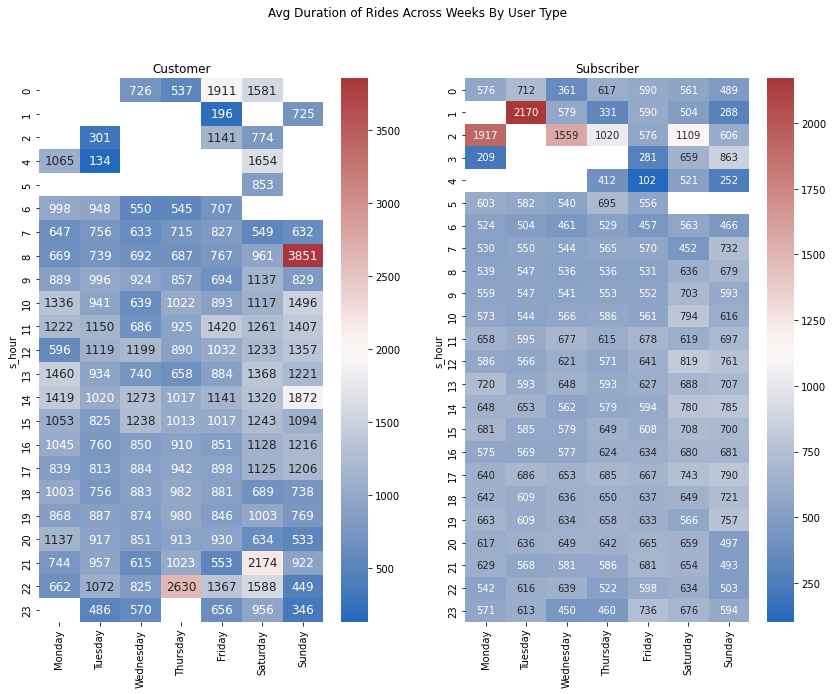

In [58]:
#Heatmap

plt.figure(figsize=(14,10))

filtered_data = fordbike_top10.query('duration_sec <= 5000')

#plot 1
plt.subplot(1, 2, 1)
avg_dur_sec = filtered_data.query('user_type == "Customer"').groupby(['s_dayofweek', 
                                                                           's_hour']).mean().astype(int)['duration_sec']


avg_dur_sec = avg_dur_sec.reset_index(name = 'Avg_dur_in_sec') 
avg_dur_sec = avg_dur_sec.pivot(index = 's_hour', columns = 's_dayofweek', 
                                      values = 'Avg_dur_in_sec')
cTitles = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
avg_dur_sec = avg_dur_sec.reindex(columns = cTitles)


sns.heatmap(avg_dur_sec, cmap ='vlag', annot=True, fmt='g', annot_kws={"size": 12}) 
plt.xlabel('')
plt.title('Customer')

plt.suptitle('Avg Duration of Rides Across Weeks By User Type')

#plot 2
plt.subplot(1, 2, 2)
avg_dur_sec = filtered_data.query('user_type == "Subscriber"').groupby(['s_dayofweek', 
                                                                           's_hour']).mean().astype(int)['duration_sec']
avg_dur_sec = avg_dur_sec.reset_index(name = 'Avg_dur_in_sec') 
avg_dur_sec = avg_dur_sec.pivot(index = 's_hour', columns = 's_dayofweek', 
                                      values = 'Avg_dur_in_sec')

cTitles = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
avg_dur_sec = avg_dur_sec.reindex(columns = cTitles)
sns.heatmap(avg_dur_sec, cmap ='vlag', annot=True, fmt='g', annot_kws={"size": 10}) 
plt.xlabel('')
plt.title('Subscriber')
plt.show()

#### Observations
>- Once more, it is evident that customers generally take longer trips than subscribers. 
>- Subscribers tend to make shorter trips during weekdays and longer rides on weekends, with the longest trips taking place between 10am and 5pm, specifically around noon to early afternoon. 
>- Likewise, customers also take longer trips on weekends than weekdays, however they are less affected by the day of the week. >- Customers usually take longer trips from 10am to 4pm during the week.

## Conclusion

Entire Dataset:

>- Subscriber were 89.2% and customer were 10.8%
>- The average age of the riders was 33.96.
>- Male were dominant among the population of riders.
>- Bike rides were prominent during the work day and working hours(8AM to 5PM)
>- Market St at 10th St is the most populous station where a ride starts based on the number of rides and 16th St Depot is the least one.
>- The number of rides taken by subscriber were more compared to customers and the same was consistent acorss the day and week.
>- No correlation was identified between the age and duration of the rides.

Top 10 Stations where a ride originates:

>- The wasn't a clear indication if a particular time of the day were contributing towards the number of rides.
>- There was a clear shift in usage targetting the Top 10 stations, where customer spent more time on rides than subscribers and the same is supported by the representation of data in Heatmap.